In [333]:
from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon, LineString, MultiLineString
import matplotlib.pyplot as plt
import requests
import geojson
from pyproj import CRS

In [138]:
DATA_PATH = Path("../site-master/source/notebooks/L3/data")

In [139]:
DATA_PATH

WindowsPath('../site-master/source/notebooks/L3/data')

In [5]:
data = pd.read_csv(DATA_PATH / "addresses.txt", sep=";")

In [6]:
data.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [7]:
geo = gpd.tools.geocode(data["addr"],
                        provider="nominatim",
                        user_agent="paolo_test",
                        timeout=4
                       )

In [8]:
geo.head()

,geometry,address
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns..."
1,POINT (24.93166 60.16905),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,POINT (24.94179 60.16989),"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust..."
3,POINT (24.97783 60.18892),"Hermannin rantatie, Verkkosaari, Kalasatama, S..."
4,POINT (24.92160 60.15665),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län..."


In [9]:
geo2 = gpd.GeoDataFrame(
    data=data,
    geometry=gpd.tools.geocode(data["addr"],
                               provider="nominatim",
                               user_agent="paolo_test",
                               timeout=4
                              )["geometry"]
)

In [10]:
geo2.head()

,id,addr,geometry
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94179 60.16989)
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97783 60.18892)
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [11]:
geo2.to_file(DATA_PATH / "addresses.shp")

## Point in Polygons

In [12]:
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)
poly_coords = [(24.950899, 60.169158), (24.953492, 60.169158), 
               (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(poly_coords)

In [13]:
p1.within(poly)

True

In [14]:
poly.contains(p2)

False

In [15]:
print(poly.centroid)

POINT (24.952242428492358 60.16960179038188)


In [16]:
dist = LineString([p1, poly.centroid]).length

In [17]:
dist

4.3792075416758285e-07

## Intersections

In [18]:
l1 = LineString([(0, 0), (1, 1)])
l2 = LineString([(1, 1), (0, 2)])

In [19]:
l1.intersects(l2)

True

In [20]:
l1.touches(l2)

True

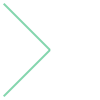

In [21]:
ml = MultiLineString([l1, l2])
ml

In [22]:
l3 = LineString([(0, 1), (1, 0)])

In [23]:
l1.intersects(l3)

True

In [24]:
l1.touches(l3)

False

## Locations in regions

In [25]:
data = gpd.read_file(DATA_PATH / "addresses.shp")

In [26]:
data.head()

,id,addr,geometry
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94179 60.16989)
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97783 60.18892)
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [27]:
gpd.io.file.fiona.drvsupport.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [28]:
# Enable KML driver
gpd.io.file.fiona.drvsupport.supported_drivers["LIBKML"] = "rw"

In [29]:
polys = (gpd.read_file(DATA_PATH / "PKS_suuralue.kml",
                      driver="LIBKLM")
         [["Name", "description", "geometry"]]
        )

In [30]:
polys.head()

,Name,description,geometry
0,Suur-Espoonlahti,None,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,None,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,None,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,None,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,None,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."


<AxesSubplot:>

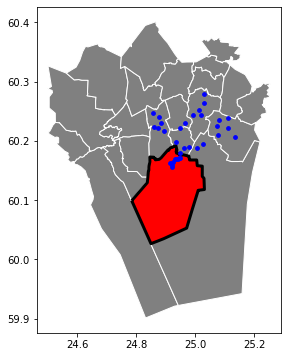

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
polys.plot(ax = ax,
           facecolor="gray", 
           edgecolor="white",
           linewidth=1
          )
(polys
 .query("Name == 'Eteläinen'")
 .plot(
     ax=ax,
     facecolor="red",
     edgecolor="k",
     linewidth=3
 )
)
data.plot(
    ax=ax,
    color="blue",
    markersize=14
)

In [32]:
polys.query("Name == 'Eteläinen'")["geometry"]

10    POLYGON Z ((24.78277 60.09997 0.00000, 24.8197...
Name: geometry, dtype: geometry

In [33]:
data.head()

,id,addr,geometry
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94179 60.16989)
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97783 60.18892)
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [34]:
pip_mask = data.within((polys
                        .query("Name == 'Eteläinen'")
                        .reset_index()
                        .at[0, "geometry"])
                      )

In [35]:
pip_data = data[pip_mask]

In [37]:
pip_data.head()

,id,addr,geometry
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94179 60.16989)
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)
10,1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (24.94410 60.17133)


<AxesSubplot:>

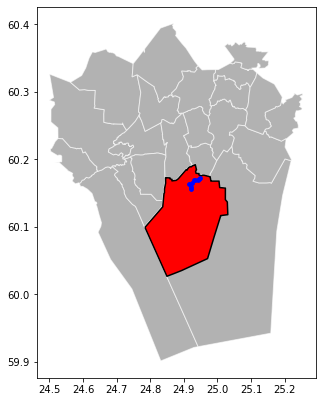

In [40]:
fig, ax = plt.subplots(figsize=(5, 7))
polys.plot(
    ax=ax,
    facecolor="gray",
    edgecolor="white",
    linewidth=1,
    alpha=0.6
)
(polys
 .query("Name == 'Eteläinen'")
 .plot(
     ax=ax,
     facecolor="red",
     edgecolor="black",
     linewidth=1.5,
 )
)
pip_data.plot(
    ax=ax,
    color="b",
    markersize=14
)

## Spatial joins

In [43]:
url = "https://kartta.hsy.fi/geoserver/wfs"

params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

req = requests.get(url, params=params)

pop = gpd.GeoDataFrame.from_features(geojson.loads(req.content))

In [44]:
pop.head()

,geometry,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",688,9,28.0,99,99,99,99,99,99,99,99,99
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",703,5,51.0,99,99,99,99,99,99,99,99,99
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",710,8,44.0,99,99,99,99,99,99,99,99,99
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",711,5,90.0,99,99,99,99,99,99,99,99,99
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",715,11,41.0,99,99,99,99,99,99,99,99,99


In [45]:
pop = (pop
       .rename(
           columns={"asukkaita": "population"}
       )
       [["geometry", "population"]]
      )

In [46]:
pop.head()

,geometry,population
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",9
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",5
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",8
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",5
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",11


In [48]:
addrs = gpd.read_file(DATA_PATH / "addresses.shp")

In [49]:
addrs.head()

,id,addr,geometry
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94179 60.16989)
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97783 60.18892)
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [50]:
addrs.crs == pop.crs

False

In [51]:
addrs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
pop.crs

In [54]:
pop.crs = CRS.from_epsg(3879).to_wkt()

In [55]:
addrs.crs == pop.crs

False

In [56]:
addrs = (addrs
         .to_crs(pop.crs)
        )

In [57]:
addrs.crs == pop.crs

True

In [58]:
# Spatial join

pop_addrs = gpd.sjoin(addrs, pop, how="inner", predicate="within")

In [59]:
pop_addrs.head()

,id,addr,geometry,index_right,population
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (25495311.608 6672258.695),3252,515
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (25496206.216 6672909.016),3364,182
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (25496768.622 6673002.004),3488,38
10,1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (25496896.734 6673162.114),3488,38
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (25498769.713 6675121.127),3822,61


<AxesSubplot:>

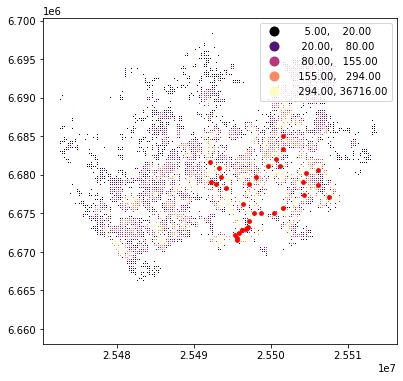

In [70]:
_, ax = plt.subplots(figsize=(8, 6))
pop.plot(
    ax=ax,
    column="population",
    scheme="Quantiles",
    cmap="magma",
    edgecolor="white",
    # linewidth=1
    legend=True
)
addrs.plot(
    ax=ax,
    color="r",
    markersize=14
)
    

In [71]:
pop_addrs.to_file(DATA_PATH / "addesses_population.shp")

C:\Users\andri\AppData\Local\Temp/ipykernel_19164/3237536941.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pop_addrs.to_file(DATA_PATH / "addesses_population.shp")


## Nearest neighbor analysis

In [73]:
from shapely.ops import nearest_points

In [75]:
# Origin point
orig = Point(1, 1.67)

# Possible destination points
dest1 = Point(0, 1.45)
dest2 = Point(2, 2)
dest3 = Point(0, 2.5)

destinations = MultiPoint([dest1, dest2, dest3])

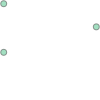

In [76]:
destinations

In [77]:
nearest_loc = nearest_points(orig, destinations)

In [78]:
len(nearest_loc)

2

In [79]:
print(nearest_loc[0])
print(nearest_loc[1])

POINT (1 1.67)
POINT (0 1.45)


In [80]:
gpd.io.file.fiona.drvsupport.supported_drivers["LIBKML"] = "rw"

In [83]:
locs = (gpd.read_file(DATA_PATH / "PKS_suuralue.kml", driver="LIBKML")
        [["Name", "description", "geometry"]])
addrs = gpd.read_file(DATA_PATH / "addresses.shp")

In [84]:
locs.head()

,Name,description,geometry
0,Suur-Espoonlahti,None,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,None,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,None,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,None,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,None,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."


In [86]:
locs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [87]:
addrs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [90]:
locs = (locs
        .to_crs(epsg=3067)
        .assign(
            centroid=lambda x:x.centroid
        )
       )
addrs = addrs.to_crs(epsg=3067)

In [91]:
locs.head()

,Name,description,geometry,centroid
0,Suur-Espoonlahti,None,"POLYGON ((376322.317 6665639.417, 376401.244 6...",POINT (375676.529 6658405.261)
1,Suur-Kauklahti,None,"POLYGON ((367726.077 6673018.023, 367715.245 6...",POINT (365520.906 6675893.101)
2,Vanha-Espoo,None,"POLYGON ((371207.712 6677289.881, 371174.739 6...",POINT (367400.175 6681941.088)
3,Pohjois-Espoo,None,"POLYGON ((376528.523 6683480.345, 376638.253 6...",POINT (372191.037 6687785.458)
4,Suur-Matinkylä,None,"POLYGON ((375347.271 6672052.630, 375354.852 6...",POINT (375678.189 6670243.076)


In [129]:
def get_nearest_address(orig_row, dest_gdf):
    #List of destinations
    dests = dest_gdf["centroid"].unary_union
    
    # Get nearest destination centroid
    nearest_info = nearest_points(orig_row["geometry"], dests)
    nearest_centroid = nearest_info[1]
    
    # Get nearest destination name
    nearest_data = (dest_gdf
                    .loc[dest_gdf["centroid"] == nearest_centroid]
                    .reset_index()
                    )
    nearest_name = nearest_data.loc[0, "Name"]
    return nearest_name

In [130]:
addrs = (addrs
         .assign(
             nearest_location=lambda y:y.apply(
                 get_nearest_address, dest_gdf=locs, axis=1)
         )
        )

In [131]:
addrs.head()

,id,addr,geometry,nearest_location
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (384320.898 6671412.395),Keskinen
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (385234.571 6672035.181),Keskinen
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (385799.399 6672111.080),Keskinen
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (387863.244 6674168.130),Keskinen
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (384632.937 6670672.154),Keskinen


## Spatial Index

In [224]:
# Intersections
inters = gpd.read_file(DATA_PATH / "uusimaa_intersections.gpkg")
postcodes = gpd.read_file(DATA_PATH / "uusimaa_postal_code_areas.gpkg")

In [225]:
inters.head()

,x,y,geometry
0,330888.502,6675829.949,POINT (330888.502 6675829.949)
1,348059.990,6670041.685,POINT (348059.990 6670041.685)
2,348022.592,6670202.858,POINT (348022.592 6670202.858)
3,297208.220,6669048.357,POINT (297208.220 6669048.357)
4,330835.341,6675586.834,POINT (330835.341 6675586.834)


In [226]:
postcodes.head()

,posti_alue,he_vakiy,geometry
0,00100,18284.0,"MULTIPOLYGON (((385653.893 6671591.048, 385573..."
1,00120,7108.0,"MULTIPOLYGON (((385316.092 6671076.984, 385279..."
2,00130,1508.0,"MULTIPOLYGON (((386212.111 6671061.262, 386176..."
3,00140,7865.0,"MULTIPOLYGON (((386577.050 6670280.544, 386552..."
4,00150,9496.0,"MULTIPOLYGON (((384846.102 6669565.816, 384823..."


In [227]:
inters.crs

<Derived Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [228]:
postcodes.crs

<Derived Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

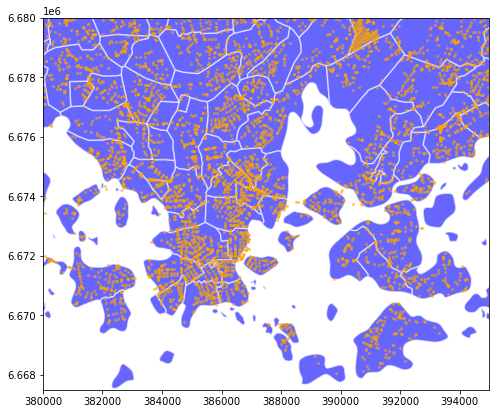

In [229]:
_, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([380000, 395000])
ax.set_ylim([6667500, 6680000])
postcodes.plot(
    ax=ax,
    facecolor="blue",
    edgecolor="white",
    linewidth=1.5,
    alpha=0.6
)
inters.plot(
    ax=ax,
    color="orange",
    markersize=4,
    alpha=0.5
)


In [230]:
inters = (inters
          .assign(
              sindex=lambda x:x.sindex
          )
         )

In [231]:
inters.head()

,x,y,geometry,sindex
0,330888.502,6675829.949,POINT (330888.502 6675829.949),<geopandas.sindex.PyGEOSSTRTreeIndex object at...
1,348059.990,6670041.685,POINT (348059.990 6670041.685),<geopandas.sindex.PyGEOSSTRTreeIndex object at...
2,348022.592,6670202.858,POINT (348022.592 6670202.858),<geopandas.sindex.PyGEOSSTRTreeIndex object at...
3,297208.220,6669048.357,POINT (297208.220 6669048.357),<geopandas.sindex.PyGEOSSTRTreeIndex object at...
4,330835.341,6675586.834,POINT (330835.341 6675586.834),<geopandas.sindex.PyGEOSSTRTreeIndex object at...


In [232]:
# Focusing on city center
city_center = (postcodes
               .query("posti_alue == '00100'")
               .reset_index()
              )

In [233]:
inters_sindex = inters.sindex

In [234]:
inters_sindex

In [235]:
test = city_center["geometry"].values[0]

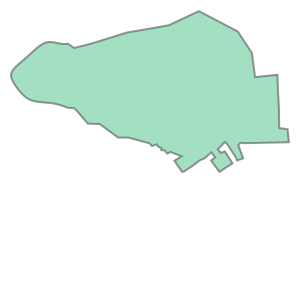

In [236]:
test

In [237]:
city_center.bounds.values[0]

array([ 383657.1097, 6671591.0475,  386319.6003, 6673131.8935])

In [238]:
point_candidates = (inters
                    .loc[inters_sindex.intersection(city_center.bounds.values[0])]
                    .reset_index()
                   )

<AxesSubplot:>

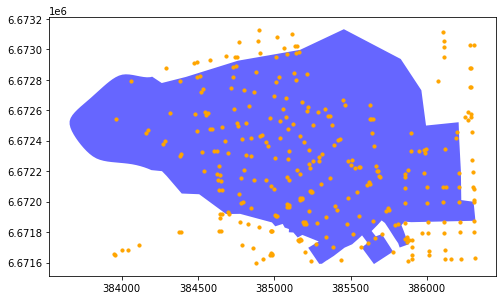

In [239]:
_, ax = plt.subplots(figsize=(8, 8))
city_center.plot(
    ax=ax,
    facecolor="blue",
    alpha=0.6
)
point_candidates.plot(
    ax=ax,
    markersize=10,
    color="orange"
)

In [240]:
points_idx = point_candidates.within(city_center["geometry"].values[0], align=True)

In [241]:
points_idx.sum()

203

<AxesSubplot:>

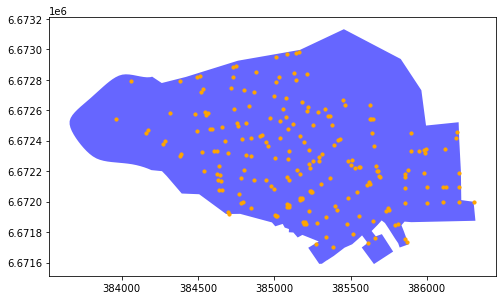

In [242]:
_, ax = plt.subplots(figsize=(8, 8))
city_center.plot(
    ax=ax,
    facecolor="blue",
    alpha=0.6
)
(point_candidates
 .loc[points_idx]
 .plot(
     ax=ax,
     markersize=10,
     color="orange"
 )
)

## Number of intersections per postcodes

In [243]:
inters_cnts = (gpd.sjoin(postcodes, inters, how="inner")
               .groupby(
                   by="posti_alue"
               )
               .agg(
                   num_inters=("posti_alue", len)
               )
               .reset_index()
              )

In [244]:
inters_cnts.head()

,posti_alue,num_inters
0,00100,203
1,00120,35
2,00130,50
3,00140,44
4,00150,68


In [245]:
postcodes_inters = (postcodes
                    .merge(inters_cnts, on="posti_alue")
                    .assign(
                        inters_density=lambda x:(x["num_inters"]
                                                 /(x.area / 1000000))
                    )
                   )

In [247]:
postcodes_inters.head()

,posti_alue,he_vakiy,geometry,num_inters,inters_density
0,00100,18284.0,"MULTIPOLYGON (((385653.893 6671591.048, 385573...",203,86.262634
1,00120,7108.0,"MULTIPOLYGON (((385316.092 6671076.984, 385279...",35,84.539110
2,00130,1508.0,"MULTIPOLYGON (((386212.111 6671061.262, 386176...",50,116.560895
3,00140,7865.0,"MULTIPOLYGON (((386577.050 6670280.544, 386552...",44,47.218358
4,00150,9496.0,"MULTIPOLYGON (((384846.102 6669565.816, 384823...",68,49.732046


<AxesSubplot:>

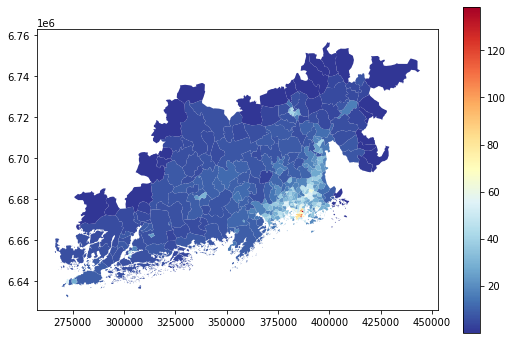

In [252]:
_, ax = plt.subplots(figsize=(9, 6))
postcodes_inters.plot(
    ax=ax,
    column="inters_density",
    cmap="RdYlBu_r",
    legend=True
)

## Nearest neighbor analysis with large datasets

In [253]:
from zipfile import ZipFile
import io

In [254]:
stops = gpd.read_file(DATA_PATH / "pt_stops_helsinki.gpkg")

In [257]:
stops.head()

,stop_name,stop_lat,stop_lon,stop_id,geometry
0,Ritarihuone,60.169460,24.956670,1010102,POINT (24.95667 60.16946)
1,Kirkkokatu,60.171270,24.956570,1010103,POINT (24.95657 60.17127)
2,Kirkkokatu,60.170293,24.956721,1010104,POINT (24.95672 60.17029)
3,Vironkatu,60.172580,24.956554,1010105,POINT (24.95655 60.17258)
4,Vironkatu,60.172990,24.956380,1010106,POINT (24.95638 60.17299)


In [256]:
with ZipFile(DATA_PATH / "building_points_helsinki.zip") as z:
    filename = z.namelist()[0]
    print(filename)
    print(io.BytesIO(z.read(filename)))
    buildings = gpd.read_file(io.BytesIO(z.read(filename)))

building_points_helsinki.gpkg


In [258]:
buildings.head()

,name,geometry
0,None,POINT (24.85584 60.20727)
1,Uimastadion,POINT (24.93045 60.18882)
2,None,POINT (24.95113 60.16994)
3,Hartwall Arena,POINT (24.92918 60.20570)
4,Talli,POINT (24.92607 60.21346)


In [261]:
from shapely.geometry import box

<AxesSubplot:>

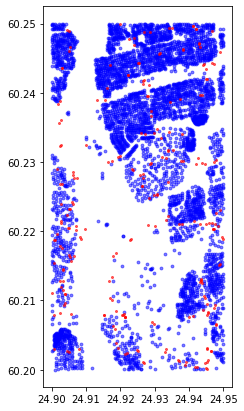

In [267]:
_, ax = plt.subplots(figsize=(7, 7))
(buildings
 .loc[(buildings
       .within(box(24.9, 60.2, 24.95, 60.25)))]
 .plot(
    ax=ax,
    color="blue",
    markersize=8,
    alpha=0.5
 )
)
(stops
 .loc[(stops
       .within(box(24.9, 60.2, 24.95, 60.25)))]
 .plot(
     ax=ax,
     color="red",
     markersize=4,
     alpha=0.6
 )
)
# ax.set_xlim([24.9, 24.95])
# ax.set_ylim([60.2, 60.25])

In [268]:
from sklearn.neighbors import BallTree

## Exercises

### 1

In [276]:
data = pd.read_csv(DATA_PATH / "shopping_centers.txt", sep=";")

In [277]:
data

,id,name,addr
0,1001,Itis,"Itäkatu 1, 00930 Helsinki, Finland"
1,1002,Forum,"Mannerheimintie 20, 00100 Helsinki, Finland"
2,1003,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
3,1004,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland"
4,1005,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"
5,1006,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland"
6,1007,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland"


In [278]:
geodata = gpd.GeoDataFrame(
    data=data,
    geometry=gpd.tools.geocode(
        data["addr"],
        provider="nominatim",
        user_agent="malls",
        timeout=4
    )["geometry"]
)           

In [279]:
geodata

,id,name,addr,geometry
0,1001,Itis,"Itäkatu 1, 00930 Helsinki, Finland",POINT (25.08294 60.21170)
1,1002,Forum,"Mannerheimintie 20, 00100 Helsinki, Finland",POINT (24.93858 60.16893)
2,1003,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",POINT (24.73763 60.16291)
3,1004,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",POINT (24.81042 60.21752)
4,1005,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",POINT (24.96282 60.29245)
5,1006,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",POINT (24.97904 60.18702)
6,1007,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland",POINT (24.93137 60.19866)


In [280]:
geodata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [281]:
geodata = (geodata
           .to_crs(epsg=3879)
          )

In [282]:
geodata.to_file(DATA_PATH / "shopping_centers.shp")

### 2

In [283]:
geodata = (geodata
           .assign(
               buffer=lambda x:x.buffer(
                   distance=1500
               )
           )
          )

In [284]:
geodata.head()

,id,name,addr,geometry,buffer
0,1001,Itis,"Itäkatu 1, 00930 Helsinki, Finland",POINT (25504598.602 6677662.109),"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,1002,Forum,"Mannerheimintie 20, 00100 Helsinki, Finland",POINT (25496590.247 6672895.892),"POLYGON ((25498090.247 6672895.892, 25498083.0..."
2,1003,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",POINT (25485431.705 6672252.372),"POLYGON ((25486931.705 6672252.372, 25486924.4..."
3,1004,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",POINT (25489491.076 6678322.265),"POLYGON ((25490991.076 6678322.265, 25490983.8..."
4,1005,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",POINT (25497943.932 6686656.982),"POLYGON ((25499443.932 6686656.982, 25499436.7..."


In [286]:
import contextily as cx

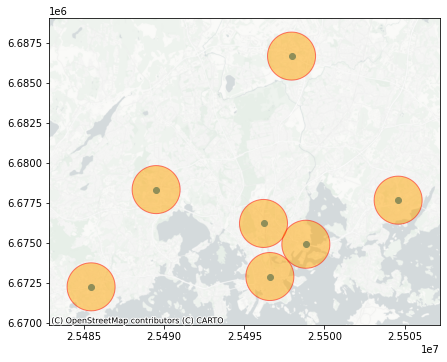

In [287]:
_, ax = plt.subplots(figsize=(7, 7))
geodata.plot(ax=ax)
geodata["buffer"].plot(ax=ax,
                       facecolor="orange",
                       edgecolor="red",
                       alpha=0.5
                      )
cx.add_basemap(ax=ax,
               source=cx.providers.CartoDB.PositronNoLabels,
               crs=geodata.crs.to_string()
              )

In [288]:
geodata

,id,name,addr,geometry,buffer
0,1001,Itis,"Itäkatu 1, 00930 Helsinki, Finland",POINT (25504598.602 6677662.109),"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,1002,Forum,"Mannerheimintie 20, 00100 Helsinki, Finland",POINT (25496590.247 6672895.892),"POLYGON ((25498090.247 6672895.892, 25498083.0..."
2,1003,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",POINT (25485431.705 6672252.372),"POLYGON ((25486931.705 6672252.372, 25486924.4..."
3,1004,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",POINT (25489491.076 6678322.265),"POLYGON ((25490991.076 6678322.265, 25490983.8..."
4,1005,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",POINT (25497943.932 6686656.982),"POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,1006,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",POINT (25498837.156 6674909.983),"POLYGON ((25500337.156 6674909.983, 25500329.9..."
6,1007,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland",POINT (25496193.557 6676208.169),"POLYGON ((25497693.557 6676208.169, 25497686.3..."


In [289]:
geodata = (geodata
           .drop(["addr", "geometry"], axis=1)
           .rename(
               columns={"buffer": "geometry"}
           )
          )

### 3

In [290]:
type(geodata)

geopandas.geodataframe.GeoDataFrame

In [296]:
url = "https://kartta.hsy.fi/geoserver/wfs"

params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

req = requests.get(url, params=params)
pop = (gpd.GeoDataFrame.from_features(geojson.loads(req.content))
       .rename(
           columns={"asukkaita": "population"}
       )
       [["geometry", "population"]]
       .set_crs(epsg=3879)
      )

In [297]:
geodata

,id,name,geometry
0,1001,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,1002,Forum,"POLYGON ((25498090.247 6672895.892, 25498083.0..."
2,1003,Iso-omena,"POLYGON ((25486931.705 6672252.372, 25486924.4..."
3,1004,Sello,"POLYGON ((25490991.076 6678322.265, 25490983.8..."
4,1005,Jumbo,"POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,1006,REDI,"POLYGON ((25500337.156 6674909.983, 25500329.9..."
6,1007,Tripla,"POLYGON ((25497693.557 6676208.169, 25497686.3..."


In [298]:
pop.head()

,geometry,population
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",9
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",5
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",8
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",5
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",11


In [299]:
pop.crs

<Derived Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [313]:
malls_pop = gpd.sjoin(geodata, pop, how="inner", predicate="contains")

In [306]:
malls_pop.head()

,id,name,geometry,index_right,population
0,1001,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5230,59
0,1001,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5169,147
0,1001,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5229,31
0,1001,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5168,186
0,1001,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5228,82


In [314]:
(malls_pop
 .groupby(
     by=["name"]
 )
 .agg(
     pop_coverage=("population", sum)
 )
 .sort_values(
     by=["pop_coverage"]
 )
)

,pop_coverage
name,
Jumbo,10569
Sello,20965
Itis,21008
Tripla,21569
REDI,24913
Iso-omena,27301
Forum,56322


### 4

In [315]:
locs = pd.read_csv(DATA_PATH / "activity_locations.txt", sep=";")

In [317]:
locs

,id,addr
0,1001,"Klausstrasse, 20, 22765 Hamburg, Germany"
1,1002,"Via Nazionale, 7, 23038 Valdidentro, Italy"


In [323]:
geo_locs = gpd.GeoDataFrame(
    data=locs,
    geometry=gpd.tools.geocode(
        locs["addr"],
        provider="nominatim",
        user_agent="locs",
        timeout=4
    )["geometry"]
)

In [319]:
geo_loc

,id,addr,geometry
0,1001,"Klausstrasse, 20, 22765 Hamburg, Germany",POINT (9.93174 53.55008)
1,1002,"Via Nazionale, 7, 23038 Valdidentro, Italy",POINT (10.29617 46.48862)


In [320]:
malls = pd.read_csv(DATA_PATH / "shopping_centers.txt", sep=";")

In [321]:
geo_malls = gpd.GeoDataFrame(
    data=malls,
    geometry=gpd.tools.geocode(
        malls["addr"],
        provider="nominatim",
        user_agent="malls",
        timeout=4
    )["geometry"]
)

In [322]:
geo_malls

,id,name,addr,geometry
0,1001,Itis,"Itäkatu 1, 00930 Helsinki, Finland",POINT (25.08294 60.21170)
1,1002,Forum,"Mannerheimintie 20, 00100 Helsinki, Finland",POINT (24.93858 60.16893)
2,1003,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",POINT (24.73763 60.16291)
3,1004,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",POINT (24.81042 60.21752)
4,1005,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",POINT (24.96282 60.29245)
5,1006,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",POINT (24.97904 60.18702)
6,1007,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland",POINT (24.93137 60.19866)


In [343]:
malls_array = geo_malls["geometry"].unary_union
locs_array = geo_locs["geometry"]

In [341]:
geo_locs.at[0, "addr"]

'Klausstrasse, 20, 22765 Hamburg, Germany'

In [351]:
for loc in locs_array:
    start_addr = (geo_locs
                  .loc[geo_locs["geometry"]==loc]
                  .reset_index()
                  .at[0, "addr"]
                 )
    nearest_info = nearest_points(loc, malls_array)
    nearest_mall_pt = nearest_info[1]
    nearest_mall_name = (geo_malls
                         .loc[geo_malls["geometry"]==nearest_mall_pt]
                         .reset_index()
                         .at[0, "name"]
                        )
    print(f"Closest mall to {start_addr} is {nearest_mall_name}")

Closest mall to Klausstrasse, 20, 22765 Hamburg, Germany is Iso-omena
Closest mall to Via Nazionale, 7, 23038 Valdidentro, Italy is Iso-omena
